# HW3: Time-Integration of Initial Value Problems

## What is our goal?   

Our goal is to solve initial value problems numerically: 

## Import Libraries

In [2]:
import numpy as np
print("Succesfully imported %s -- Version: %s"%(np.__name__,np.__version__))
import scipy
print("Succesfully imported %s -- Version: %s"%(scipy.__name__,scipy.__version__))
import matplotlib.pyplot as plt
print("Succesfully imported %s"%plt.__name__)
import pandas as pd
print("Succesfully imported %s -- Version: %s"%(pd.__name__,pd.__version__))
import sympy as sym 
print("Succesfully imported %s -- Version: %s"%(sym.__name__,sym.__version__))
from scipy import optimize
print("Succesfully imported %s"%optimize.__name__)
from scipy.optimize import fsolve
print("Succesfully imported %s"%fsolve.__name__)
from scipy.signal import find_peaks
print("Succesfully imported %s"%find_peaks.__name__)
from scipy.linalg import orth
print("Succesfully imported %s"%orth.__name__)
from scipy.integrate import odeint
print("Succesfully imported %s"%odeint.__name__)

Succesfully imported numpy -- Version: 1.20.1
Succesfully imported scipy -- Version: 1.6.2
Succesfully imported matplotlib.pyplot
Succesfully imported pandas -- Version: 1.2.4
Succesfully imported sympy -- Version: 1.8
Succesfully imported scipy.optimize
Succesfully imported fsolve
Succesfully imported find_peaks
Succesfully imported orth
Succesfully imported odeint


## Section 1/: Introduction and Model Description

Extend version of introduction given above.  

Various functions to perform time integration within scipy do exist. These include 
- [scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html): calls lsoda from the FORTRAN library odepack in netlib; recommends using the function solve_ivp() instead; 
- [scipy.integrate.ode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html): allows to call any of vode (Real-valued Variable-coefficient Ordinary Differential Equation solver, with fixed-leading-coefficient implementation. It provides implicit Adams method (for non-stiff problems) and a method based on backward differentiation formulas (BDF) (for stiff problems)), zvode, lsoda (Real-valued Variable-coefficient Ordinary Differential Equation solver, with fixed-leading-coefficient implementation. It provides automatic method switching between implicit Adams method (for non-stiff problems) and a method based on backward differentiation formulas (BDF) (for stiff problems)), dopri5 (This is an explicit runge-kutta method of order (4)5 due to Dormand & Prince (with stepsize control and dense output)) and dop835 (This is an explicit runge-kutta method of order 8(5,3) due to Dormand & Prince (with stepsize control and dense output))
- [scipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html):  most modern implementation; 

We need to clearly explain the difference between t_eval (post-processing) on one hand and the atol/rtol (size of time-step) pair on the other hand. 

## Section 2:/ Time Integration of ODEs 

### Section 1.2/: Example of solving a system of two coupled of ODE using the function solve_ivp()
Using the [Lotka-Volterra system](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html). 

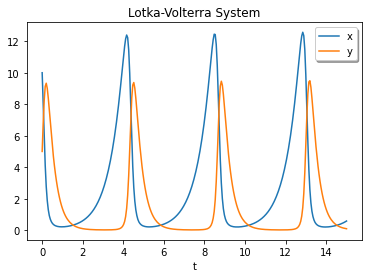

In [4]:
def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    return [a*x - b*x*y, -c*y + d*x*y]

sol = scipy.integrate.solve_ivp(lotkavolterra, [0, 15], [10, 5], args=(1.5, 1, 3, 1),
                dense_output=True)

t = np.linspace(0, 15, 300)
z = sol.sol(t)

plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['x', 'y'], shadow=True)
plt.title('Lotka-Volterra System')
plt.show()

### Section 2.2/: Example of solving a second order ODE using the function odeint() 

The pendulum example that follows was taken from the [scipy.integrate.ode manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint). Explain software in more details. Do we need to revert back to the function odeint() in order for the adjoint method to work? 

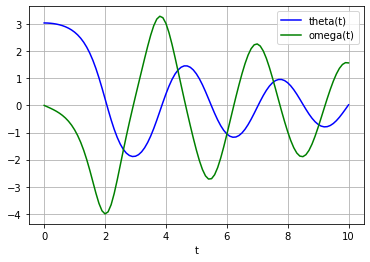

In [3]:
#..set rhs-function of ODE system 
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

#..set parameter values 
b=.25; c= 5.0;

#..set initial conditions 
y0 = [np.pi - 0.1, 0.0];

#..set time interval 
t = np.linspace(0, 10, 101);

#..solve ODE systemk 
sol = odeint(pend, y0, t, args=(b, c), full_output=1, printmessg=0);

#..plot solution obtained 
plt.plot(t, sol[0][:, 0], 'b', label='theta(t)')
plt.plot(t, sol[0][:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
def f(t, y):
        return np.arange(42)
        
def jac(t, y):
        print('hello world')

# following line never calls Jacobian because the problem is nonstiff        
solve_ivp(f, (0, 1), np.zeros(42), method='LSODA', jac=jac)

# following line will call Jacobian because it doesn't check stiffness
# but the Jacobian isn't specified properly so an error is raised
solve_ivp(f, (0, 1), np.zeros(42), method='BDF', jac=jac) 

hello world


ValueError: `jac` is expected to have shape (42, 42), but actually has ().